## Sparse Matrices

In [27]:
# importing modules

import scipy.sparse as sp
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Scipy.coo_matrix:

for example:

$$A =  \begin{bmatrix}0 & 1 & 0 & 0 \\0 & 0& 0& 2 \\0 & 0 & 3 & 0 \\4 & 0 & 0 & 0 \end{bmatrix} $$

In [28]:
# Example_01

values = [1, 2, 3, 4]
rows = [0, 1, 2, 3]
cols = [1, 3, 2, 0]

A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])
A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [29]:
# Example_02

print(f"A.shape: {A.shape}")
print(f"A.size: {A.size}")
print(f"A.dtype: {A.dtype}")
print(f"A.ndim: {A.ndim}")

A.shape: (4, 4)
A.size: 4
A.dtype: int64
A.ndim: 2


In [30]:
# Example_03

print(f"A.row: {A.row}")
print(f"A.col: {A.col}")

A.row: [0 1 2 3]
A.col: [1 3 2 0]


In [31]:
# Example_04
# converting the sparse matrix A from COO format to CSR format:

A.tocsr()

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [32]:
# Example_05
# converting the sparse matrix A from COO to a numpy array:

A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [33]:
# Example_06

# creating a dense numpy array:
A = np.array([
    [1, 2, 0, 0],
    [0, 3, 4, 0],
    [0, 0, 5, 6],
    [7, 0, 8, 9]
])

# converting to csr matrix:
A = sp.csr_matrix(A)

# Some related attributes
print(f"A.data: {A.data}")
print(f"A.indices: {A.indices}")
print(f"A.indptr: {A.indptr}")

A.data: [1 2 3 4 5 6 7 8 9]
A.indices: [0 1 1 2 2 3 0 2 3]
A.indptr: [0 2 4 6 9]


In [34]:
# Example_07

i = 2
print(f"A.indptr[{i}], A.indptr[{i + 1}] - 1: {A.indptr[i], A.indptr[i+1] - 1}")
print(f"A.indices[A.indptr[i]:A.indptr[i+1]]: {A.indices[A.indptr[i]:A.indptr[i+1]]}")
print(f"A.data[A.indptr[i]:A.indptr[i+1]]: {A.data[A.indptr[i]:A.indptr[i+1]]}")
A[2, 2], A[2, 3]    # checking

A.indptr[2], A.indptr[3] - 1: (4, 5)
A.indices[A.indptr[i]:A.indptr[i+1]]: [2 3]
A.data[A.indptr[i]:A.indptr[i+1]]: [5 6]


(5, 6)

### Functions for creating sparse matrices:

In [35]:
# Example_08
# creating a sparse matrix of size 10 by 10
# with a main diagonal and an upper and lower diagonal

N = 10
A = sp.eye(N, k=1) - 2 * sp.eye(N) + sp.eye(N, k=-1)
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [36]:
# Example_09
# creating a sparse matrix of size 10 by 10
# using sp.diags()

A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format="csc")
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

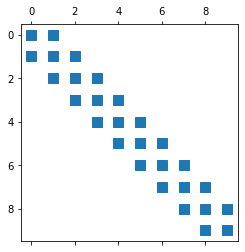

In [37]:
# Example_10
# visualizing sparse matrix using matplotlib

fig, ax = plt.subplots()
ax.spy(A)

Creating a sparse matrix for a tensor product between A and the matrix

$$B =  \begin{bmatrix}0 & 1 & 0 \\1 & 0& 1 \\0 & 1 & 0 \\\end{bmatrix}$$

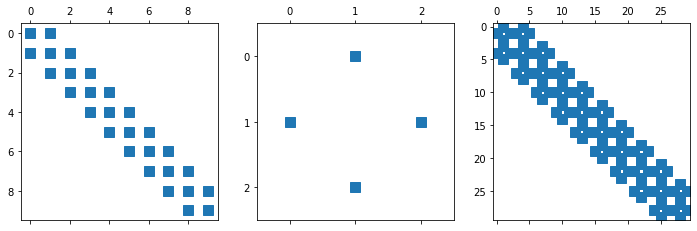

In [38]:
# Example_11

B = sp.diags([1, 1], [-1, 1], shape=[3, 3])
C = sp.kron(A, B)
fig, (ax_A, ax_B, ax_C) = plt.subplots(1, 3, figsize=(12, 4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)

### Sparse Linear Algebra Functions
#### Linear equation systems:

In [39]:
# Example_12
# A is the tridiagonal matrix
# b is a dense vector filled with negative ones

N = 10
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')
b = -np.ones(N)

x = sp.linalg.spsolve(A, b)
print(f"x: {x}")

x: [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.]


In [40]:
# Example_13
# Solving problem above using dense direct solver
scipy.linalg.solve(A.todense(), b)

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [41]:
# Example_14
# Explicitly compute the LU factorization
# LU factorization of matrix A:

lu = sp.linalg.splu(A)
print(f"lu.L: {lu.L.__repr__}\n")
print(f"lu.U: {lu.U.__repr__}")

lu.L: <bound method spmatrix.__repr__ of <10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>>

lu.U: <bound method spmatrix.__repr__ of <10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>>


Once the LU factorization is available, we can efficiently solve the
equation $LUx = b$ using the $solve$ method for the lu object:

In [42]:
# Example_15
x = lu.solve(b)
x

array([ 5.,  9., 12., 14., 15., 15., 14., 12.,  9.,  5.])

In [43]:
def sp_permute(A, perm_r, perm_c):
    """ Permute rows and columns of A """
    M, N = A.shape
    # row permutation matrix
    Pr = sp.coo_matrix((np.ones(M), (perm_r, np.arange(N)))).tocsr()
    # column permutation matrix
    Pc = sp.coo_matrix((np.ones(M), (np.arange(M), perm_c))).tocsr()
    return Pr.T * A * Pc.T

In [44]:
# Example_16

lu.L * lu.U     # != 0

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

In [45]:
# Example_17
sp_permute(lu.L * lu.U, lu.perm_r, lu.perm_c) - A     # == 0

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

##### Iterative methods:

In [46]:
# Example_18

x, info = sp.linalg.bicgstab(A, b)
print(f"x using bicgstab(): {x}")

x, info = sp.linalg.lgmres(A, b)
print(f"x using lgmres(): {x}")

x using bicgstab(): [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.]
x using lgmres(): [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.]


<ipython-input-46-a9834cd86a3f>:6: DeprecationWarning: scipy.sparse.linalg.lgmres called without specifying `atol`. The default value will change in the future. To preserve current behavior, set ``atol=tol``.
  x, info = sp.linalg.lgmres(A, b)


#### Eigenvalue Problems:

In [47]:
# Example_19
# Computing the lowest four eigenvalues for the sparse matrix of
# the one-dimensional poisson problem(of system size 10x10):

N = 10
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')
evals, evecs = sp.linalg.eigs(A, k=4, which='LM')
print(f"evals: {evals}")

evals: [-3.91898595+0.j -3.68250707+0.j -3.30972147+0.j -2.83083003+0.j]


In [48]:
# Example_20
np.allclose(A.dot(evecs[:, 0]), evals[0] * evecs[:, 0])

True

In [49]:
# Example_21
# Largest magnitude
evals, evecs = sp.linalg.eigsh(A, k=4, which="LM")
evals

array([-3.91898595, -3.68250707, -3.30972147, -2.83083003])

In [50]:
# Example_22
# Smallest magnitude
evals, evecs = sp.linalg.eigsh(A, k=4, which="SM")
print(f"evals: {evals}")

np.real(evals).argsort()

evals: [-1.16916997 -0.69027853 -0.31749293 -0.08101405]


array([0, 1, 2, 3])

In [53]:
# Example_23
# Defining a function which returns the eigenvalues and eigenvectors
# stored by the real part of the eigenvalue:

def sp_eigs_sorted(A, k=6, which="SR"):
    """ Compute and return eigenvalues stored by the real part """
    evals, evecs = sp.linalg.eigs(A, k=k, which=which)
    idx = np.real(evals).argsort()
    return evals[idx], evecs[idx]

# testing
evals, evecs = sp_eigs_sorted(A, k=4, which="SM")
evals

array([-1.16916997+0.j, -0.69027853+0.j, -0.31749293+0.j, -0.08101405+0.j])

Text(0, 0.5, 'eig.vals. of $(1-x)M_1+xM_2$')

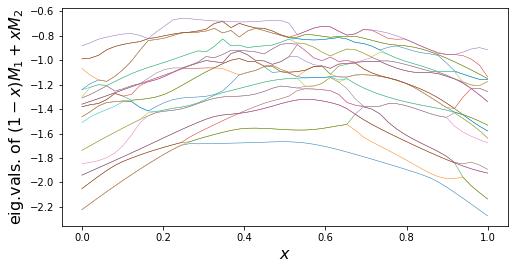

In [64]:
# Example_24
# The spectrum of the lowest 25 eigenvalues of the sparse matrix
# (1 - x)M1 + xM2 as a function of x , where M1, M2 are two random matrices

N = 100
x_vec = np.linspace(0, 1, 50)

M1 = sp.rand(N, N, density=0.2)
M2 = sp.rand(N, N, density=0.2)

evals_mat = np.array([sp_eigs_sorted((1-x)*M1 + x*M2, k=25)[0] for x in x_vec])

fig, ax = plt.subplots(figsize=(8, 4))
for idx in range(evals_mat.shape[1]):
    ax.plot(x_vec, np.real(evals_mat[:,idx]), lw=0.5)
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"eig.vals. of $(1-x)M_1+xM_2$", fontsize=16)
